### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5

#### Дисциплина: Компьютерный практикум по интеллектуальным системам

##### Студент: Сатлихана Петрити
##### Группа:   НПИбд-02-21

# Задание
- Выполнить кластеризацию на несколько кластеров. Проверить с помощью силуэтного коэффициента
http://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set

 Bыполнение кластеризации данных с помощью алгоритмов K-means и DBSCAN для выявления нескольких кластеров на основе признаков CO (угарный газ) и NOX (оксиды азота). Для оценки качества кластеризации был использован силуэтный коэффициент.

Bыполнение кластеризации данных с помощью алгоритма K-means для выявления нескольких кластеров на основе признаков CO (угарный газ) и NOX (оксиды азота). Для оценки качества кластеризации был использован силуэтный коэффициент

In [51]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка и подготовка данных и Нормализация данных

In [79]:
# Указание пути к папке с данными
folder_path = '/content/drive/MyDrive/University/Viti IV/1 SEMESTER/MODULE 2/Компьютерный практикум по интеллектуальным системам/Lab5'
# список CSV файлов в папке
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
# Чтение всех CSV файлов и объединение их в один DataFrame
data = pd.concat([pd.read_csv(os.path.join(folder_path, file)) for file in csv_files], ignore_index=True)
# Выбор только колонок 'CO' и 'NOX' для кластеризации
features = data[['CO', 'NOX']]
# Нормализация данных с использованием StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(features)

In [81]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


## Кластеризация методом K-means



Силуэтный коэффициент для 2 кластеров: 0.6431107960556189
Центры кластеров:
[[-0.18344505 -0.14621061]
 [ 2.51735139  2.0063963 ]]


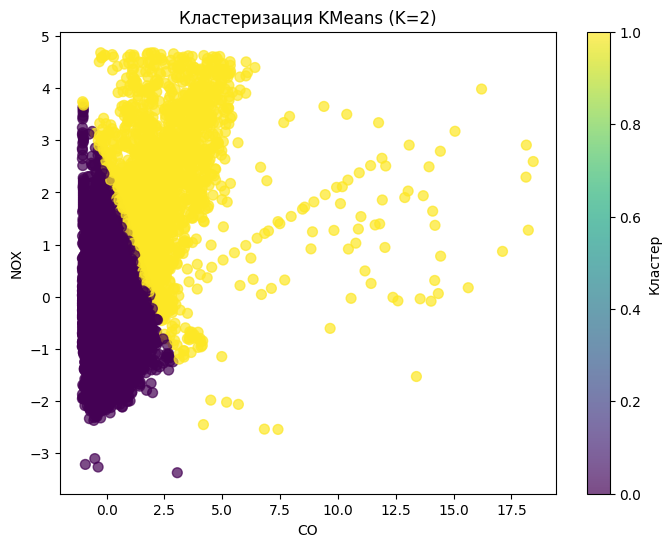

In [80]:
# Выполнение кластеризации с 2 кластерами
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Вычисление силуэтного коэффициента для 2 кластеров
silhouette_avg = silhouette_score(normalized_data, clusters)
print(f'Силуэтный коэффициент для 2 кластеров: {silhouette_avg}')

# Вывод центров кластеров
print(f'Центры кластеров:\n{kmeans.cluster_centers_}')

# Визуализация результатов кластеризации с 2 кластерами
plt.figure(figsize=(8, 6))
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.title('Кластеризация KMeans (K=2)')
plt.xlabel('CO')
plt.ylabel('NOX')
plt.colorbar(label='Кластер')
plt.show()

Оценка кластеризации с помощью силуэтного коэффициента показала хороший результат: 0.643, что свидетельствует о чёткой и осмысленной разделимости данных.